<a href="https://colab.research.google.com/github/Lupin3-droid/Lupin3-droid/blob/main/avitjob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import time

class AviatorGame:
    def __init__(self, lambda_param=0.9): # Fixed typo here: __init__
        self.lambda_param = lambda_param

    def play_round(self):
        multiplier = 1.0
        fly_away_point = random.expovariate(self.lambda_param)

        while True:
            print(f"Current Multiplier: {multiplier:.2f}x")
            action = input("Press 'c' to cash out or 'n' to continue: ").strip().lower()
            if action == 'c':
                print(f"Cashed out at {multiplier:.2f}x")
                return multiplier
            elif action == 'n':
                multiplier += random.uniform(0.1, 1.0)
                time.sleep(0.5)  # Simulate time delay for realism
                if multiplier >= fly_away_point:
                    print(f"The airplane crashed at {fly_away_point:.2f}x!")
                    return 0
            else:
                print("Invalid input. Please press 'c' to cash out or 'n' to continue.")

# Example usage
game = AviatorGame()

while True:
    print("\nNew Round Starting...")
    winnings = game.play_round()
    print(f"You won: {winnings:.2f}x your bet")
    play_again = input("Do you want to play again? (yes/no): ").strip().lower()
    if play_again != 'yes':
        break

print("Thank you for playing!")


New Round Starting...
Current Multiplier: 1.00x
Press 'c' to cash out or 'n' to continue: c
Cashed out at 1.00x
You won: 1.00x your bet
Do you want to play again? (yes/no): n
Thank you for playing!


In [ ]:
class MyRandom:
    def _init_(self, seed=None):
        if seed is None:
            seed = int(time.time() * 1000)  # Use current time in milliseconds as the seed
        self.seed = seed
        self.mersenne_twister = self._mersenne_twister(seed)

    def _mersenne_twister(self, seed):
        # Initialize the generator from a seed (simplified version)
        mt = [0] * 624
        mt[0] = seed
        for i in range(1, 624):
            mt[i] = (1812433253 * (mt[i - 1] ^ (mt[i - 1] >> 30)) + i) & 0xffffffff

        index = 624
        while True:
            if index == 624:
                for i in range(624):
                    y = (mt[i] & 0x80000000) + (mt[(i + 1) % 624] & 0x7fffffff)
                    mt[i] = mt[(i + 397) % 624] ^ (y >> 1)
                    if y % 2 != 0:
                        mt[i] ^= 0x9908b0df
                index = 0
            y = mt[index]
            y ^= (y >> 11)
            y ^= (y << 7) & 0x9d2c5680
            y ^= (y << 15) & 0xefc60000
            y ^= (y >> 18)
            index += 1
            yield y & 0xffffffff

    def randint(self, min_val, max_val):
        # Use the Mersenne Twister generator to generate a random integer
        random_number = next(self.mersenne_twister)
        return min_val + (random_number % (max_val - min_val + 1))

    def uniform(self, min_val, max_val):
        # Generate a random float in the range [min_val, max_val)
        random_number = next(self.mersenne_twister) / 0xffffffff
        return min_val + random_number * (max_val - min_val)

# Example usage:
if __name__ == "_main_":
    my_random = MyRandom()

    print("Random integers between 1 and 100:")
    for _ in range(10):
        print(my_random.randint(1, 100))

    print("\nRandom floats between 0 and 1:")
    for _ in range(10):
        print(my_random.uniform(0, 1))



in this second face am trying to figure which statistical distribution does the data come from. general analysis is done to do so.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path="/content/processed_data.csv"
df=pd.read_csv(file_path)
df.head()

,Data,Color
0,4.27,purple
1,1.85,blue
2,1.25,blue
3,1.30,blue
4,1.32,blue


In [ ]:
#the following code is for grouping the data by colour.
df.info()
df.groupby('Color').describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    5748 non-null   float64
 1   Color   5748 non-null   object 
dtypes: float64(1), object(1)
memory usage: 89.9+ KB


3065.46

In [ ]:
df["Data"].max()

3065.46

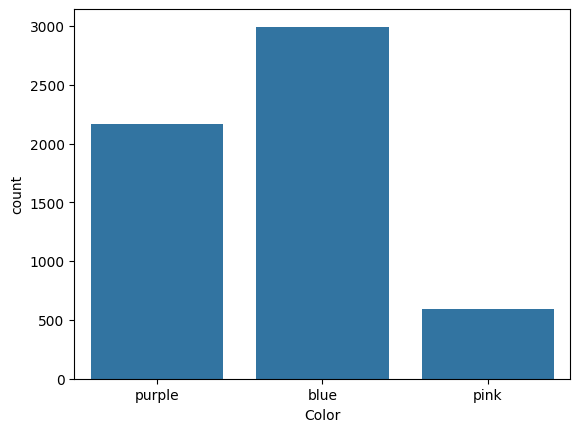

In [ ]:
#did some data visualizations.
sns.countplot(x='Color',data=df);


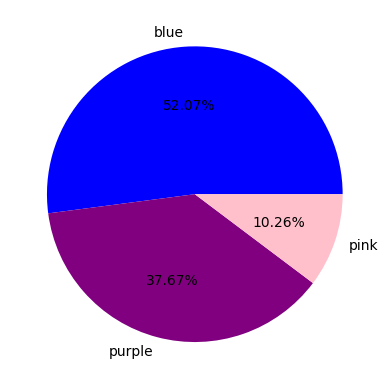

In [ ]:
plt.pie(df['Color'].value_counts().unique(),autopct='%1.2f%%', colors=["Blue","Purple","Pink"],labels=["blue","purple", "pink"]);

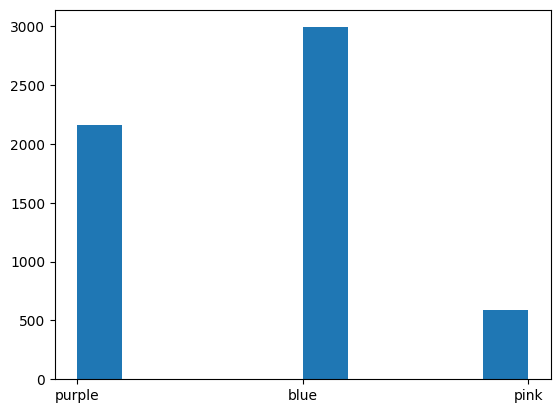

In [ ]:
plt.hist(df['Color']);

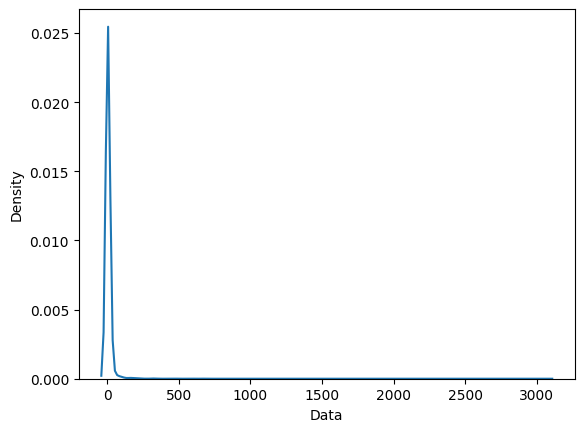

In [ ]:
sns.kdeplot(df['Data']);

In [ ]:
!pip install distfit

In [ ]:
from distfit import distfit

dist= distfit(alpha=0.05, smooth=10)
dist.fit_transform(df['Data'])
dist

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.387376] [loc=9.364 scale=82.149]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.138356] [loc=1.000 scale=8.364]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.523967] [loc=0.266 scale=0.734]
[distfit] >INFO> [dweibull  ] [0.13 sec] [RSS: 0.15438] [loc=1.320 scale=2.004]
[distfit] >INFO> [t         ] [0.22 sec] [RSS: 0.249541] [loc=1.499 scale=0.517]
[distfit] >INFO> [genextreme] [0.41 sec] [RSS: 0.656701] [loc=1.453 scale=0.721]
[distfit] >INFO> [gamma     ] [0.11 sec] [RSS: 0.380324] [loc=1.000 scale=1.595]
[distfit] >INFO> [lognorm   ] [0.01 sec] [RSS: 0.543409] [loc=0.993 scale=0.871]
[distfit] >INFO> [beta      ] [0.24 sec] [RSS: 0.207227] [loc=1.000 scale=12249.471]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.406642] [loc=1.000 scale=3064.460]
[distfit] >INFO> [loggamma  ] [0.09 sec] [RSS: 0.392828] [loc=-46455.024 sc

In [ ]:
best_distr=dist.model
print(f"Best fit distribution is {best_distr}")

Best fit distribution is {'name': 'expon', 'score': 0.13835593967499704, 'loc': 1.0, 'scale': 8.364248434237995, 'arg': (), 'params': (1.0, 8.364248434237995), 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b607ae04f70>, 'bootstrap_score': 0, 'bootstrap_pass': None, 'color': '#e41a1c', 'CII_min_alpha': 1.429029857267978, 'CII_max_alpha': 26.05704897847019}


In [ ]:
best_dist = dist.model
print(best_dist['name'])
print(best_dist['params'])

expon
(1.0, 8.364248434237995)


[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Expon(loc:1.000000, scale:8.364248)


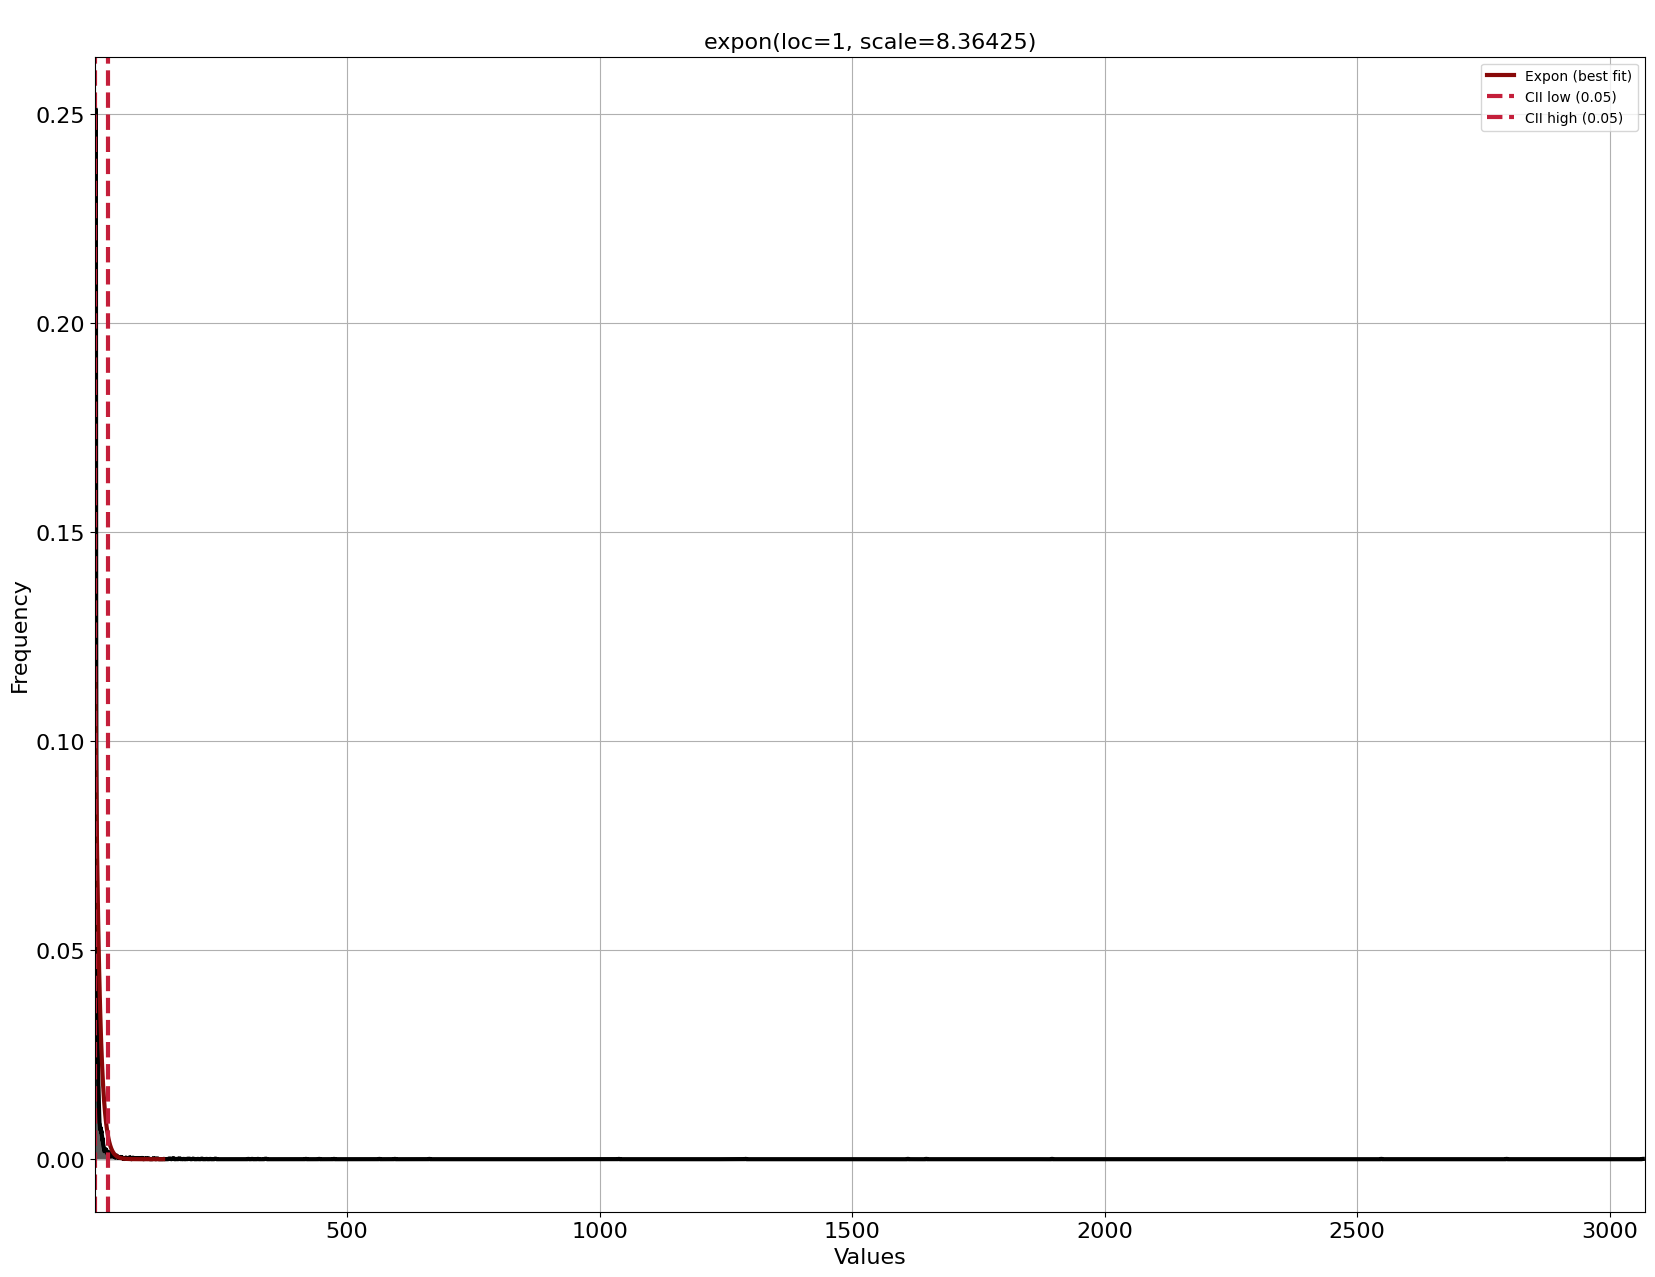

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Expon(loc:1.000000, scale:8.364248)


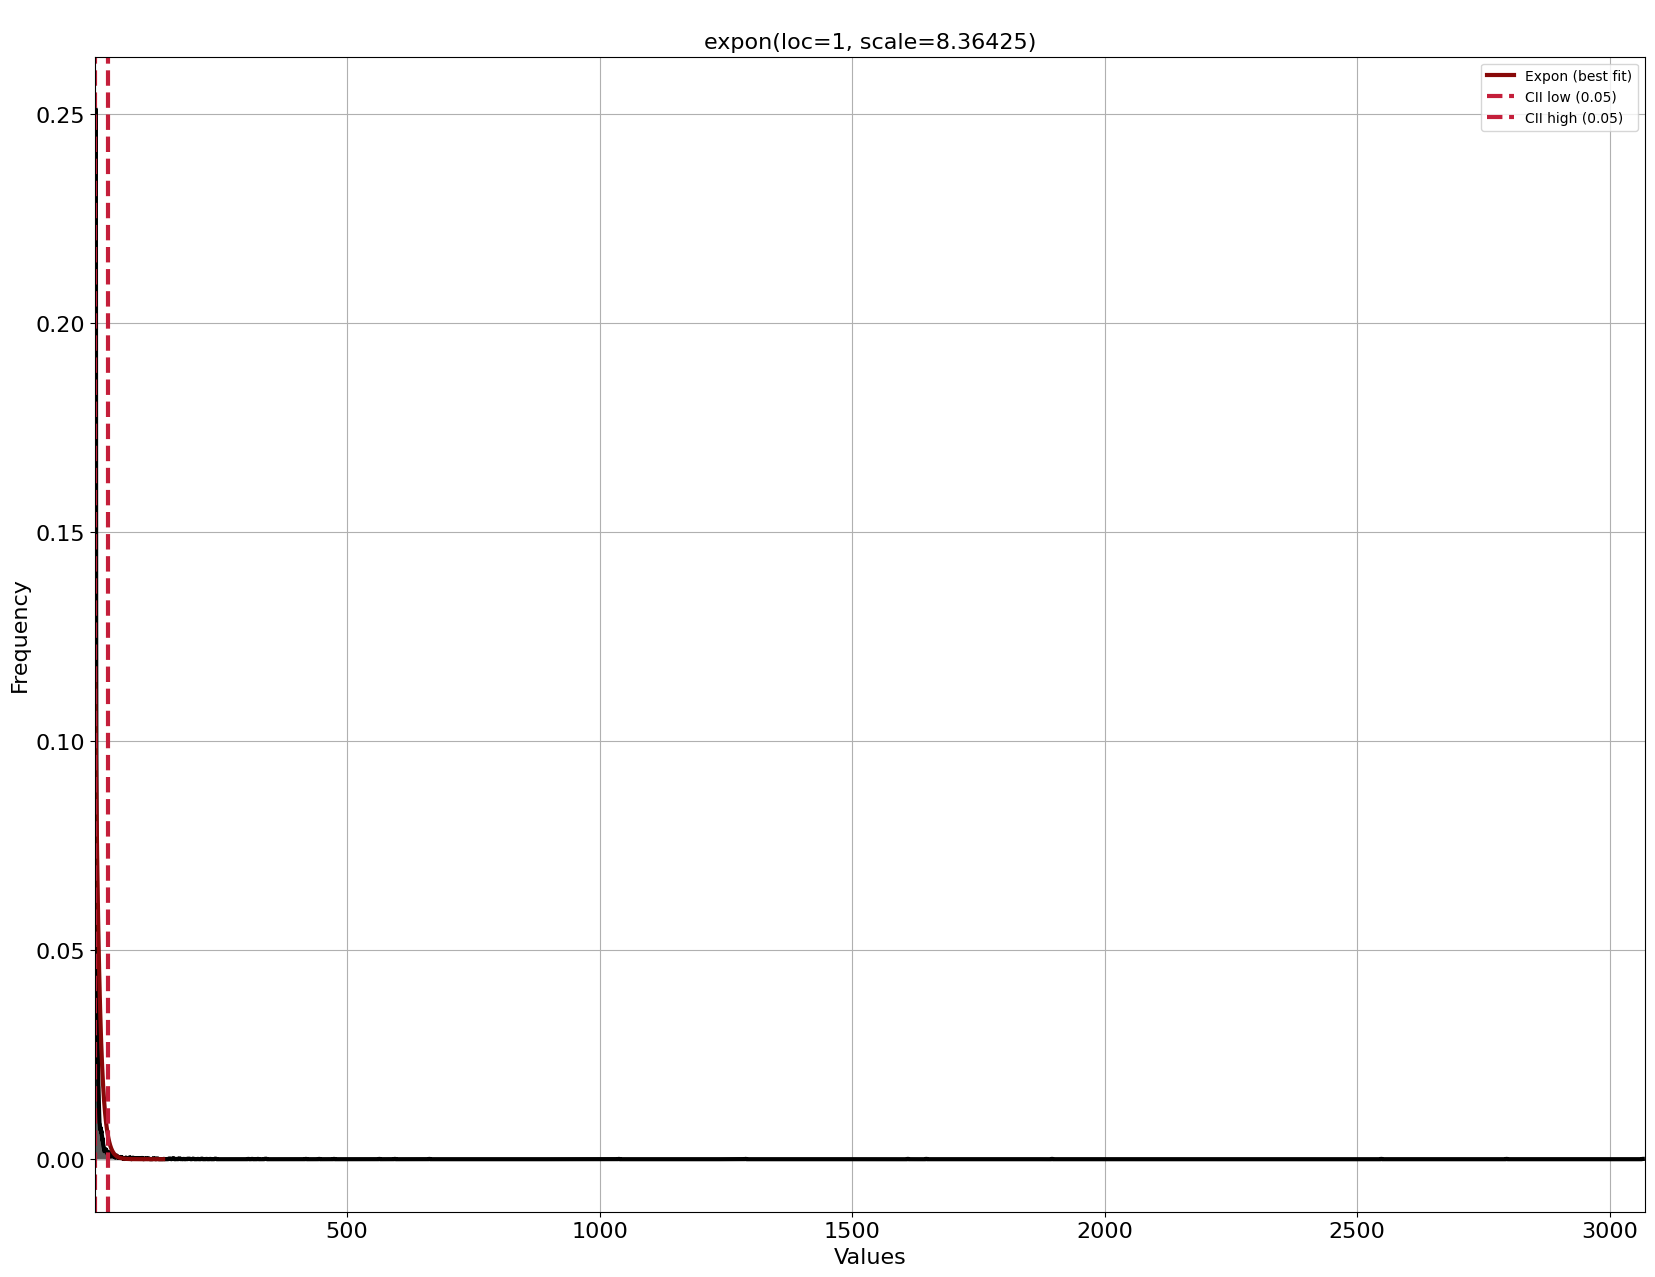

In [ ]:
dist.plot()
plt.xlim(1,3070)
plt.show()